In [1]:
# import
import pandas as pd
import sqlite3
import numpy as np
import re
from sqlite3 import Error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:

# Load data from sources
stations = pd.read_csv('../data/stations.csv', index_col=None)
fsq_pois = pd.read_csv('../data/fsq_businesses.csv', index_col=None)
yelp_pois = pd.read_csv('../data/yelp_businesses.csv', index_col=None)

In [9]:
# Create combined dataframe

combined_df = pd.concat([fsq_pois, yelp_pois], keys=['fsq_pois', 'yelp_pois'], ignore_index=True)

In [10]:
combined_df.head()

,fsq_id,name,s_lat,s_lon,p_lat,p_lon,category_id,category_name,distance,rating,popularity,price,id,review_count,categories
0,4fdc9a79e4b0735a6deafc25,Starbucks,40.795,-73.9645,40.795045,-73.965638,13035.0,Coffee Shop,100.0,8.1,0.997958,1.0,NaN,NaN,NaN
1,554c1424498e6819b466c0e7,Bob's Your Uncle,40.795,-73.9645,40.798842,-73.962943,13010.0,Dive Bar,447.0,8.4,0.979331,2.0,NaN,NaN,NaN
2,49c079b1f964a52068551fe3,Buceo 95,40.795,-73.9645,40.793603,-73.971090,13025.0,Wine Bar,581.0,8.6,0.972596,3.0,NaN,NaN,NaN
3,49c079b1f964a52068551fe3,Buceo 95,40.795,-73.9645,40.793603,-73.971090,13347.0,Tapas Restaurant,581.0,8.6,0.972596,3.0,NaN,NaN,NaN
4,5f9dfef4780f611751f28d05,Bánh,40.795,-73.9645,40.800819,-73.965730,13032.0,"Cafe, Coffee, and Tea House",654.0,8.8,0.976677,2.0,NaN,NaN,NaN


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15457 entries, 0 to 15456
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fsq_id         15437 non-null  object 
 1   name           15457 non-null  object 
 2   s_lat          15437 non-null  float64
 3   s_lon          15437 non-null  float64
 4   p_lat          15437 non-null  float64
 5   p_lon          15437 non-null  float64
 6   category_id    15437 non-null  float64
 7   category_name  15437 non-null  object 
 8   distance       15457 non-null  float64
 9   rating         15209 non-null  float64
 10  popularity     15408 non-null  float64
 11  price          14278 non-null  object 
 12  id             20 non-null     object 
 13  review_count   20 non-null     float64
 14  categories     20 non-null     object 
dtypes: float64(9), object(6)
memory usage: 1.8+ MB


In [14]:
# Fix type and format

combined_df['category_id'] = pd.to_numeric(
    combined_df['category_id'], 
    errors='coerce'
).astype('Int64')
combined_df['price'] = pd.to_numeric(
    combined_df['price'], 
    errors='coerce'
).astype('Int64')
combined_df['review_count'] = pd.to_numeric(
    combined_df['review_count'], 
    errors='coerce'
).astype('Int64')
combined_df['rating'] = combined_df['rating'].round(2)
combined_df['popularity'] = combined_df['popularity'].round(3)

In [15]:
combined_df.head()

,fsq_id,name,s_lat,s_lon,p_lat,p_lon,category_id,category_name,distance,rating,popularity,price,id,review_count,categories
0,4fdc9a79e4b0735a6deafc25,Starbucks,40.795,-73.9645,40.795045,-73.965638,13035,Coffee Shop,100.0,8.1,0.998,1,NaN,<NA>,NaN
1,554c1424498e6819b466c0e7,Bob's Your Uncle,40.795,-73.9645,40.798842,-73.962943,13010,Dive Bar,447.0,8.4,0.979,2,NaN,<NA>,NaN
2,49c079b1f964a52068551fe3,Buceo 95,40.795,-73.9645,40.793603,-73.971090,13025,Wine Bar,581.0,8.6,0.973,3,NaN,<NA>,NaN
3,49c079b1f964a52068551fe3,Buceo 95,40.795,-73.9645,40.793603,-73.971090,13347,Tapas Restaurant,581.0,8.6,0.973,3,NaN,<NA>,NaN
4,5f9dfef4780f611751f28d05,Bánh,40.795,-73.9645,40.800819,-73.965730,13032,"Cafe, Coffee, and Tea House",654.0,8.8,0.977,2,NaN,<NA>,NaN


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15457 entries, 0 to 15456
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fsq_id         15437 non-null  object 
 1   name           15457 non-null  object 
 2   s_lat          15437 non-null  float64
 3   s_lon          15437 non-null  float64
 4   p_lat          15437 non-null  float64
 5   p_lon          15437 non-null  float64
 6   category_id    15437 non-null  Int64  
 7   category_name  15437 non-null  object 
 8   distance       15457 non-null  float64
 9   rating         15209 non-null  float64
 10  popularity     15408 non-null  float64
 11  price          14261 non-null  Int64  
 12  id             20 non-null     object 
 13  review_count   20 non-null     Int64  
 14  categories     20 non-null     object 
dtypes: Int64(3), float64(7), object(5)
memory usage: 1.8+ MB


In [18]:
# Save combined_df for future database usage
combined_df.to_csv('../data/combined_df.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [20]:
combined_df.describe()

,s_lat,s_lon,p_lat,p_lon,category_id,distance,rating,popularity,price,review_count
count,15437.000000,15437.000000,15437.000000,15437.000000,15437.0,15457.000000,15209.000000,15408.000000,14261.0,20.0
mean,40.728162,-73.970751,40.728207,-73.970772,13060.787653,557.595899,8.606312,0.975081,1.783185,681.7
std,0.039389,0.032449,0.039306,0.032540,526.22606,243.069705,0.553248,0.047476,0.736715,1228.727459
min,40.664241,-74.078900,40.656045,-74.089688,10000.0,5.000000,3.500000,0.004000,1.0,27.0
25%,40.692371,-73.993379,40.690425,-73.990949,13025.0,372.000000,8.400000,0.969000,1.0,231.75
50%,40.722438,-73.965930,40.721839,-73.966840,13064.0,564.000000,8.700000,0.980000,2.0,252.0
75%,40.759628,-73.947679,40.759485,-73.948890,13199.0,746.000000,9.000000,0.989000,2.0,396.5
max,40.810949,-73.907744,40.819432,-73.899296,19064.0,2729.000000,9.500000,1.000000,4.0,5477.0


<Figure size 800x800 with 0 Axes>

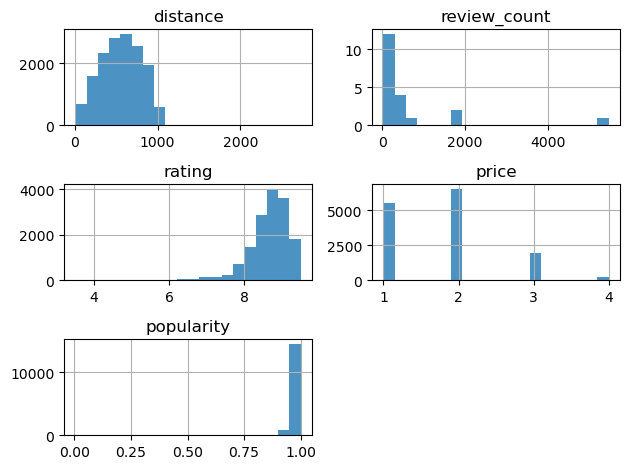

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of independant variables (all) and dependent variable (total_bikes)
plt.figure(figsize=(8, 8))
combined_df[['distance', 'review_count', 'rating', 'price', 'popularity']].hist(bins=20, alpha=0.8)
plt.tight_layout()

- Distance is well distributed
- Some outliers in review_count over 5000
- rating is left-skewed
- price seems normally distributed
- popularity is left-skewed


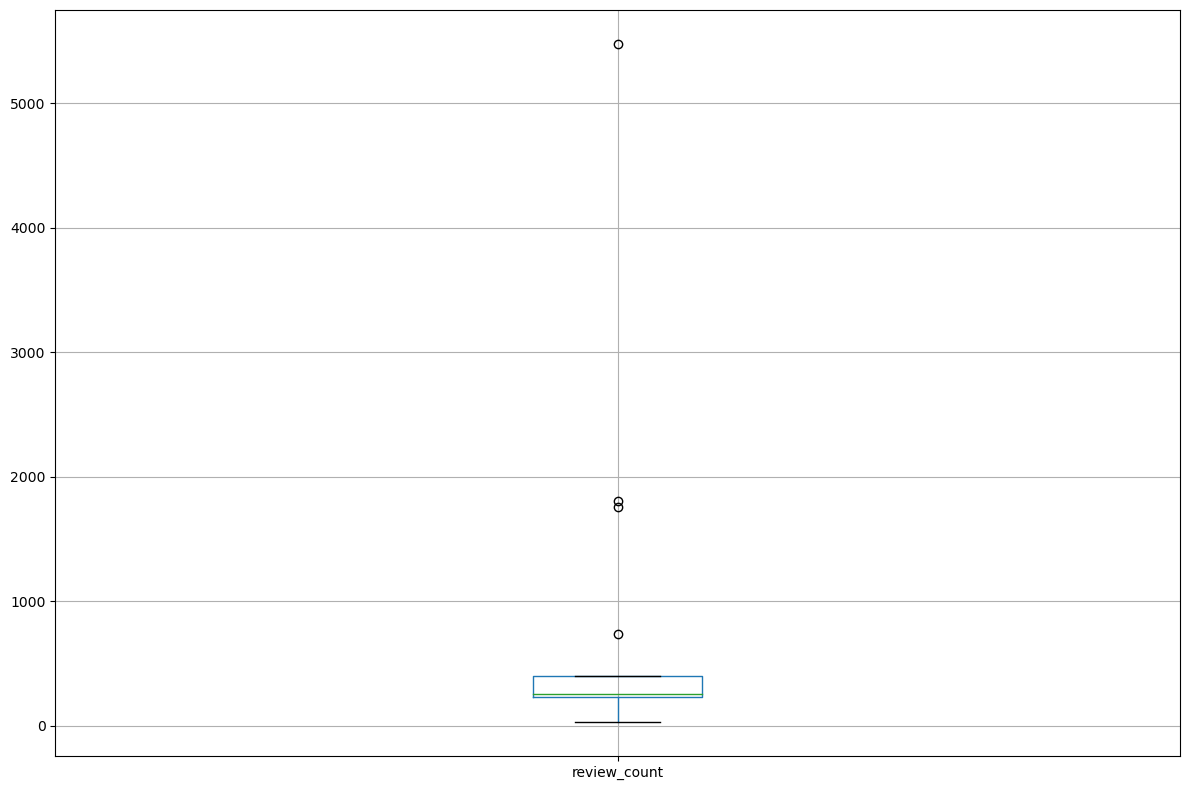

In [40]:
# Validate outliers
plt.figure(figsize=(12, 8))
combined_df[['review_count']].boxplot()
plt.tight_layout()

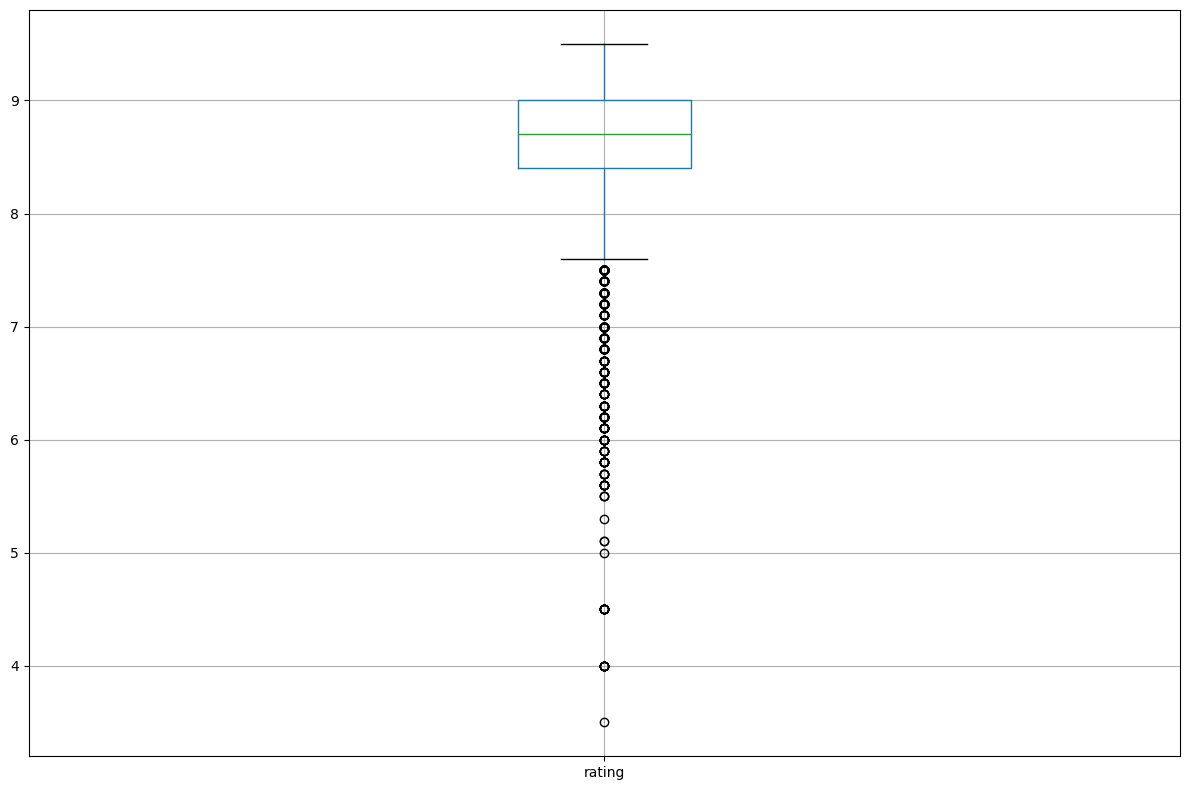

In [42]:
plt.figure(figsize=(12, 8))
combined_df[['rating']].boxplot()
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

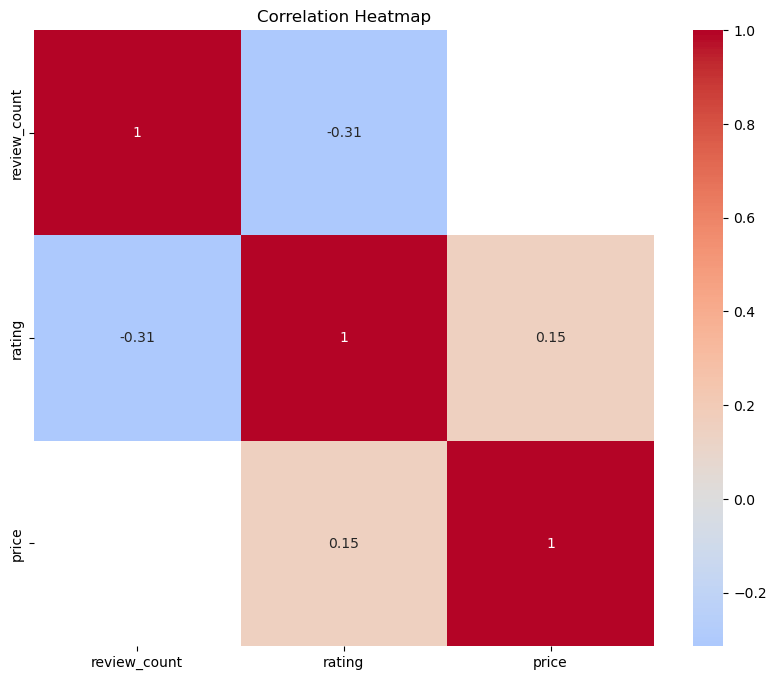

In [60]:
# Correlation
correlation_matrix = combined_df[[ 'review_count', 'rating', 'price']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [61]:
# Connection function
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [62]:
# Query function
def execute_query(queries, cursor, data=None, print_message=True):
    try:
        for query in queries:
            if data:
                cursor.execute(query, data)
            else:
                cursor.execute(query)
        
        # Commit only if all statements succeeded
        cursor.connection.commit()
        
        if print_message:
            print("Queries executed successfully")

    except sqlite3.Error as e:
        print("An error occurred:", e)
        # Rollback the transaction in case of error
        cursor.connection.rollback()

In [63]:
# Inerts function
def execute_inserts(table, query, cursor):

    # Convert DataFrame rows to list of dictionaries
    my_list = table.to_dict(orient='records')

    # Iterate through the list of dictionaries and insert data
    for row in my_list:
        try:
            execute_query(query, cursor, row, print_message=False)

        except sqlite3.Error as e:
            print("An error occurred:", e)
            
    print("Queries executed successfully")

In [64]:
# CREATE TABLE queries in related order
create_table_queries = [
"""
CREATE TABLE IF NOT EXISTS stations (
  station_id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_name VARCHAR NOT NULL,
  s_lat FLOAT NOT NULL,
  s_lon FLOAT NOT NULL,
  total_bikes INTEGER NOT NULL
);
""",
"""
CREATE TABLE IF NOT EXISTS categories (
  category_id INTEGER PRIMARY KEY,
  category_name VARCHAR NOT NULL
);
""",
"""
CREATE TABLE IF NOT EXISTS prices (
  price INTEGER PRIMARY KEY,
  price_name VARCHAR NOT NULL
);
""",
"""
CREATE TABLE IF NOT EXISTS pois (
  poi_id INTEGER PRIMARY KEY AUTOINCREMENT,
  poi_name VARCHAR NOT NULL,
  p_lat FLOAT NOT NULL,
  p_lon FLOAT NOT NULL,
  review_count INTEGER,
  rating FLOAT,
  popularity FLOAT,
  price INTEGER,
  price_change_log INTEGER,
  rating_change_log INTEGER,
  popularity_change_log INTEGER,
  FOREIGN KEY (price) REFERENCES prices(price)
);
""",
"""
CREATE TABLE IF NOT EXISTS poi_category (
  poi_id INTEGER NOT NULL,
  category_id INTEGER NOT NULL,
  PRIMARY KEY (poi_id, category_id),
  FOREIGN KEY (poi_id) REFERENCES pois(poi_id),
  FOREIGN KEY (category_id) REFERENCES categories(category_id)
);
""",
"""
CREATE TABLE IF NOT EXISTS poi_detail (
  data_id INTEGER PRIMARY KEY AUTOINCREMENT,
  station_id INTEGER NOT NULL,
  poi_id INTEGER NOT NULL,
  to_station_m INTEGER NOT NULL,
  FOREIGN KEY (station_id) REFERENCES stations(station_id),
  FOREIGN KEY (poi_id) REFERENCES pois(poi_id)
);
""",
"""
CREATE TABLE IF NOT EXISTS api (
  api_number VARCHAR PRIMARY KEY,
  api_name VARCHAR NOT NULL,
  poi_id INTEGER NOT NULL,
  FOREIGN KEY (poi_id) REFERENCES pois(poi_id)
);
"""
]

In [65]:
# Create connection and cursor
conn = create_connection('../data/mtl_bike_rentals.sqlite')
# Create cursor
cursor = conn.cursor()

Connection to SQLite DB successful


In [66]:
# Call the function to create the tables
execute_query(create_table_queries, cursor)

Queries executed successfully
